In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import sample, seed

In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
data = data.loc[data['variety'] != 'Setosa']

In [3]:
display(data.head())
display(data.shape)

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor


(100, 5)

In [4]:
data['variety'] = data['variety'].map({'Versicolor': 0, 'Virginica': 1})
y = np.array(data['variety'])
X = np.array(data.drop(['variety'], axis = 1))

EPOCHS = 1000
LEARNING_RATE = 0.01

In [6]:
# Сигмоида
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
# Бинарная кросс-энтропия (Функция потерь)
def cost_function(y, y_pred):
    eps = 1e-6    
    err = - np.mean(y * np.log(y_pred + eps) + (1 - y + eps) * np.log(1 - y_pred + eps))
    err = np.sum(err)
    return err

In [7]:
# Функции для градиентов. Для каждого признака
def theta0(X, y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (sigmoid(theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]) - y[i])
    return total_cost / (len(X)) 

def theta1(X, y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (sigmoid(theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]) - y[i]) * X[i,0]
    return total_cost / (len(X))

def theta2(X, y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (sigmoid(theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]) - y[i]) * X[i,1]
    return total_cost / (len(X))

def der_theta3(X, y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (sigmoid(theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]) - y[i]) * X[i,2]
    return total_cost / (len(X))

def der_theta4(X, y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (sigmoid(theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]) - y[i]) * X[i,3]
    return total_cost / (len(X))

In [8]:
def train(X, y, lr = LEARNING_RATE, epochs = EPOCHS ):
    theta0, theta1, theta2, theta3, theta4 = 1, 1, 1, 1, 1 # Задаем начальные веса
    costs = []
    for _ in range(epochs): 
        
        # Вычисляем градиенты
        dt0 = theta0(X, y, theta0, theta1, theta2, theta3, theta4)
        dt1 = theta1(X, y, theta0, theta1, theta2, theta3, theta4)
        dt2 = theta2(X, y, theta0, theta1, theta2, theta3, theta4)
        dt3 = theta3(X, y, theta0, theta1, theta2, theta3, theta4)
        dt4 = theta4(X, y, theta0, theta1, theta2, theta3, theta4)
        
        # Обновляем веса на шаг   
        theta0 -= lr * dt0
        theta1 -= lr * dt1
        theta2 -= lr * dt2
        theta3 -= lr * dt3
        theta4 -= lr * dt4
        
        # Рассчитываем потери
        y_pred = sigmoid(theta0 + theta1*X[:,0] + theta2*X[:,1] + theta3*X[:,2] + theta4*X[:,3])
        cost = cost_function(y, y_pred)
        costs.append(cost)
        
    plt.plot(range(epochs), costs)
    plt.xlabel("epoch")
    plt.ylabel("cost")
    plt.title("cost curve")
    return theta0, theta1, theta2, theta3, theta4

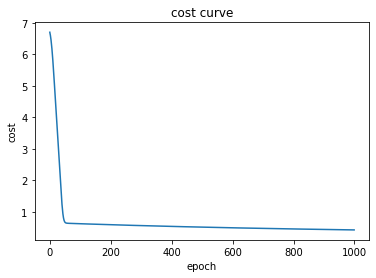

In [10]:
theta0, theta1, theta2, theta3, theta4 = train(X, y)

In [11]:
y_pred = sigmoid(theta0 + theta1*X[:,0] + theta2*X[:,1] + theta3*X[:,2] + theta4*X[:,3])
y_pred = [0 if y < 0.5 else 1 for y in y_pred]
accuracy_score(y, y_pred)

0.95